# PageRank
Today we will implement PageRank algorithm for a small collection of document about Information Retrieval. For this we will extract link information from Wikipedia and build a Google Matrix. 

Based on the matrix you will build a *reputation ranking for the documents*. Input test file `input.txt` will give you a 0-based ranking position of the document, and you will print it's title to the `output.txt`.

Example:
**input.txt**
```
3
```

**output.txt**
```
World Wide Web
```
To obtain ranking result you can use:
- Naïve approach with matrix inversion
- Power Method

Please avoid submitting your solutions with `np.linalg.eig`, even you can use it to verify you result.

# 0. Download a dataset

You can use this code to reproduce the whole pipeline on your machine. Below you will find the code, which load the adjacency matrix from string, thus you can skip code given below in your submissions.

In [1]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11686 sha256=649e70aaff09e33e59011ac5cb01bc763729d346e88db7e1d5ec6fdc8f06de60
  Stored in directory: c:\users\pavel\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia


You should consider upgrading via the 'c:\users\pavel\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import wikipedia

pages = [
    "Bag-of-words model",
    "Bayes' theorem",
    "Cluster analysis",
    "Content-based image retrieval",
    "Database",
    "Deep learning",
    "Desktop search",
    "Dimensionality reduction",
    "Discounted Cumulative Gain",
    "Eigenvector",
    "Full-text search",
    "Hypertext",
    "Image retrieval",
    "Information retrieval",
    "Information system",
    "K-nearest neighbors algorithm",
    "Language model",
    "Latent Dirichlet allocation",
    "Latent semantic analysis",
    "Low-rank approximation",
    "Multimedia information retrieval",
    "Netflix Prize",
    "Netflix",
    "Ranking (information retrieval)",
    "Recommender systems",
    "Relevance (information retrieval)",
    "Rocchio algorithm",
    "Search algorithm",
    "Search engines",
    "Semantic search",
    "Semantic web",
    "Sentiment analysis",
    "Similarity search",
    "Site search",
    "Text mining",
    "Text Retrieval Conference",
    "Tf–idf",
    "Vector space model",
    "Web crawler",
    "World Wide Web"
]

import tqdm

dataset = {}
for page in tqdm.tqdm(pages):
    dataset[page] = wikipedia.page(page)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:44<00:00,  1.10s/it]


## 0.1. Essential data is stored in adjacency matrix

Here we create a 0/1 adjacency matrix.

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:23<00:00,  1.69it/s]


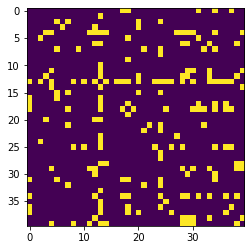

In [2]:
import numpy as np
import tqdm
import matplotlib.pyplot as plt

A = np.zeros((len(pages), len(pages)))
for j, page in enumerate(tqdm.tqdm(pages)):
    for link in dataset[page].links:
        if link in pages:
            i = pages.index(link)
            A[i, j] = 1

plt.imshow(A)
plt.show()

In [3]:
def save(mx):
    return "".join("0" if v == 0 else "1" for v in mx.flatten())
    
Atext = save(A)
print(Atext)

0000000000000000011000000000000100100100000000000000010000000000000000000000000000000101000000000000100010000000000000000000001000001000000010000000000000000000000110000001111000000000000111100010000100100000000000000010000000000001000000000000000000001100000000000000110001000010000001000100000000000100100000001010000000000000000000000000000010000000000000000000000000000000001000000000000000000000000000000000010000000000000000000000000000001000000001000000000000000110010000010001000000000100000010000000110001000010101010001010101011101001111010100111110000001000000001000000000000000000000000010000010100000000000010001000000000000000100001000000010000000000000000000000000010000000000001000010000000000001001010001000000100000100010100000100001110101100000000000000000000100000000000000000000000010000000011000000000000000000000000000000000100000000000000101000000010000000000000000000000000000100100000000000000000000000000001000000000000010000000000000010000000000100000000000000000000000000

# 1. You can start implementing your solution from this place
Use the code below in your solution to load the matrix.

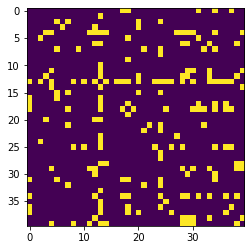

In [4]:
pages = [ "Bag-of-words model", "Bayes' theorem", "Cluster analysis", "Content-based image retrieval", "Database", "Deep learning", "Desktop search", "Dimensionality reduction", "Discounted Cumulative Gain", "Eigenvector", "Full-text search", "Hypertext", "Image retrieval", "Information retrieval", "Information system", "K-nearest neighbors algorithm", "Language model", "Latent Dirichlet allocation", "Latent semantic analysis", "Low-rank approximation", "Multimedia information retrieval", "Netflix Prize", "Netflix", "Ranking (information retrieval)", "Recommender systems", "Relevance (information retrieval)", "Rocchio algorithm", "Search algorithm", "Search engines", "Semantic search", "Semantic web", "Sentiment analysis", "Similarity search", "Site search", "Text mining", "Text Retrieval Conference", "Tf–idf", "Vector space model", "Web crawler", "World Wide Web"]
Atext = "0000000000000000011000000000000100100100000000000000010000000000000000000000000000000101000000000000100010000000000000000000001000001000000010000000000000000000000110000001111000000000000111100010000100100000000000000010000000000001000000000000000000001100000000000000110001000010000001000100000000000100100000001010000000000000000000000000000010000000000000000000000000000000001000000000000000000000000000000000010000000000000000000000000000001000000001000000000000000110010000010001000000000100000010000000110001000010101010001010101011101001111010100111110000001000000001000000000000000000000000010000010100000000000010001000000000000000100001000000010000000000000000000000000010000000000001000010000000000001001010001000000100000100010100000100001110101100000000000000000000100000000000000000000000010000000011000000000000000000000000000000000100000000000000101000000010000000000000000000000000000100100000000000000000000000000001000000000000010000000000000010000000000100000000000000000000000000000000001010010000000001001010000010110000000000000000000000000010000000000000000000000000000000000000001000000000000000000000000000011000000000000000000000001100001000000110000000000000001010010000110000000000001000000000000000010000100000100001000000000001100000100000000010000000000001000000000000010010000000000000000000000000000100000000000000000000000000100000000000100001100000100011010100101000000000000001000000000001000000000000001000000000000100001000001000000000000100100000000000010000101000001000000000100000000000000010000000000000001110010000010000100010010110000000000000111000000010"

def load(text, w=40):
    return np.array([float(a) for a in text]).reshape((w, -1))

A = load(Atext)

plt.imshow(A)
plt.show()

## 1.1. Prepare a stochastic matrix M based on adjacency matrix A

Write the code which norms matrix A column-wise. Add $\frac{1}{N}$ factor where outdegree is 0.

You can refer to wikipedia's [Google Matrix](https://en.wikipedia.org/wiki/Google_matrix#Adjacency_matrix_A_and_Markov_matrix_S) article. In construction algorthm this matrix is referred as `Markov matrix S`.

In [5]:
M = A.copy()
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        if M[i][j] == 0:
            M[i][j] = 1/(M.shape[0]*M.shape[0])
M = M / M.sum(axis=0)
# your code is here. Resulting matrix is shown below.

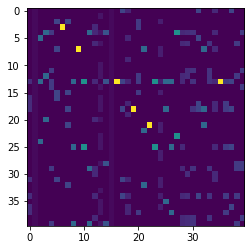

In [6]:
plt.imshow(M)
plt.show()

## 1.2. Prepare Google matrix

Compute Google matrix as described in construction block of [Google Matrix](https://en.wikipedia.org/wiki/Google_matrix#Construction_of_Google_matrix_G) article. 

`S` there is our matrix $\mathcal{M}$.

$\alpha$ is a damping factor, which is accepted to be exactly `0.85`.

In [7]:
def to_google(M, alpha=0.85):
    return alpha * M + (1-alpha)*(1/(M.sum()))

In [8]:
G = to_google(M)

In [9]:
G.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

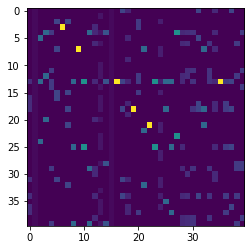

In [10]:
plt.imshow(G)
plt.show()

## 1.3. Solve naively

Everything is ready for solution. One way -- is to use algeraic solution of the equation.

$\mathbf{R} = d \mathcal{M}\mathbf{R} + \frac{1-d}{N} \mathbf{1}$

Solution is given [in this section](https://en.wikipedia.org/wiki/PageRank#Algebraic).

In [169]:
G.shape

(40, 40)

In [11]:
# your code here
N = G.shape[0]
d = 0.85

R = np.linalg.inv((np.eye(N, N) - d * M)).dot(np.ones((N, 1)) * (1 - d) / N)

np.argsort(R.reshape(-1))[::-1]

array([13,  4, 18, 39, 29, 34, 25,  7, 11, 12,  3, 17, 21,  0, 31, 37, 14,
       28, 38,  6, 36, 20,  5, 35, 32, 15,  2, 30, 16, 24, 22, 23, 19,  9,
        1, 10, 33,  8, 27, 26], dtype=int64)

## 1.4. Solve with power method

You can also use [Power method](https://en.wikipedia.org/wiki/Power_iteration) to obtain dominating eigenvector.
$R = G^{N}v_{random}$

In [12]:
# your code here

# assert np.allclose(v, R)
print(np.argsort(v.reshape(-1)))

NameError: name 'v' is not defined

In [196]:
np.argsort(v.reshape(-1))[::-1]

array([13, 18,  4, 39, 34, 29, 25, 11,  7, 12, 17,  0, 31, 37, 38,  6, 28,
       14, 21, 36,  3,  5, 35, 20, 15,  2, 32, 30, 16, 24, 23, 22, 19,  9,
       10, 33,  1,  8, 26, 27], dtype=int64)

## 1.5. Built-in check

This code below allows you to check your solution, but we do not accept it as a solution.

In [184]:
evals, evecs = np.linalg.eig(G)
np.argsort(evecs[:, 0])

array([13,  4, 18, 39, 29, 34, 11, 12,  3, 25, 14, 17, 28,  0, 38,  7,  6,
       31, 37, 36, 20, 21, 35,  5, 30, 15,  2, 16, 32, 24, 22, 23,  9, 19,
        1, 10, 33, 27,  8, 26], dtype=int64)

# 2. Ranking

First should come the documents with *the highest* PageRank.

In [15]:
# your code here



13 	 Information retrieval
4 	 Database
18 	 Latent semantic analysis
39 	 World Wide Web
29 	 Semantic search
34 	 Text mining
25 	 Relevance (information retrieval)
7 	 Dimensionality reduction
11 	 Hypertext
12 	 Image retrieval
3 	 Content-based image retrieval
17 	 Latent Dirichlet allocation
21 	 Netflix Prize
0 	 Bag-of-words model
31 	 Sentiment analysis
37 	 Vector space model
14 	 Information system
28 	 Search engines
38 	 Web crawler
6 	 Desktop search
36 	 Tf–idf
20 	 Multimedia information retrieval
5 	 Deep learning
32 	 Similarity search
35 	 Text Retrieval Conference
15 	 K-nearest neighbors algorithm
2 	 Cluster analysis
30 	 Semantic web
16 	 Language model
24 	 Recommender systems
22 	 Netflix
23 	 Ranking (information retrieval)
19 	 Low-rank approximation
9 	 Eigenvector
33 	 Site search
1 	 Bayes' theorem
10 	 Full-text search
8 	 Discounted Cumulative Gain
27 	 Search algorithm
26 	 Rocchio algorithm
